In [1]:
import numpy as np
from scipy.stats import norm, expon, chisquare
import sys
import matplotlib.pyplot as plt
import tabulate
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import math
import pandas as pd

In [2]:


objective_data = np.genfromtxt("../data/clear_objectives.txt", delimiter=',')
effective_data = np.genfromtxt("../data/effective_communicator.txt", delimiter=',')



In [3]:

X = objective_data
y = effective_data


if len(X.shape) == 1:
    print("Reshaping")
    X = np.array([X]).T


Reshaping


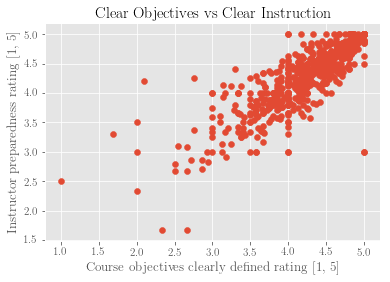

In [4]:
plt.style.use('ggplot')
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

plt.scatter(X, y)
plt.title('Clear Objectives vs Clear Instruction')
plt.xlabel('Course objectives clearly defined rating [1, 5]')
plt.ylabel('Instructor preparedness rating [1, 5]')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn


In [6]:
lm = LinearRegression()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [8]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

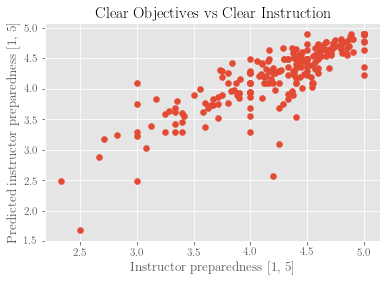

In [9]:
plt.scatter(y_test, lm.predict(X_test))
plt.title('Clear Objectives vs Clear Instruction')
plt.xlabel('Instructor preparedness [1, 5]')
plt.ylabel('Predicted instructor preparedness [1, 5]')
plt.show()


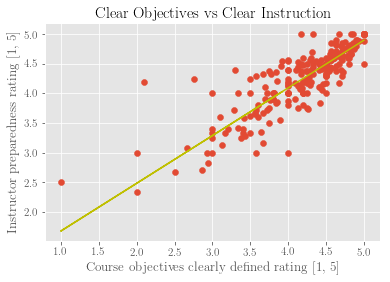

In [10]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lm.predict(X_test), color='y')
plt.title('Clear Objectives vs Clear Instruction')
plt.xlabel('Course objectives clearly defined rating [1, 5]')
plt.ylabel('Instructor preparedness rating [1, 5]')
plt.show()


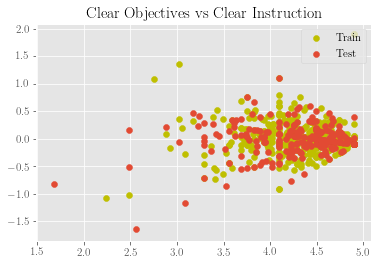

In [11]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='y', label='Train')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, label='Test')
plt.title('Clear Objectives vs Clear Instruction')
plt.legend(loc='upper right')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(lm.predict(X_test), y_test))
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - lm.predict(X_test)) ** 2))



MSE:  0.0876620795399
Fit a model X_train, and calculate MSE with Y_train: 0.0874205918903
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0876620795399


In [13]:
print("Estimated line: y = %0.4fx + %0.4f" %(lm.coef_, lm.intercept_))

Estimated line: y = 0.8048x + 0.8740


In [14]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score, mean_absolute_error

r2 = r2_score(y_test, lm.predict(X_test))

print(r2)
print(lm.score(X_test, y_test))


0.706453821453
0.706453821453


In [15]:
print(median_absolute_error(y_test, lm.predict(X_test)))
print(mean_squared_error(y_test, lm.predict(X_test)))
print(explained_variance_score(y_test, lm.predict(X_test)))
print(mean_absolute_error(y_test, lm.predict(X_test)))

0.126056092885
0.0876620795399
0.706907707141
0.202528316505


In [16]:
import tabulate

In [17]:
def generateTable(data, y_s):
    data_c = data.reshape(-1, y_s)
    print(data_c.shape)
    
    gen_table = tabulate.tabulate(data_c, tablefmt="latex")
    print(gen_table)
    

In [18]:
generateTable(y, 12)

(58, 12)
\begin{tabular}{rrrrrrrrrrrr}
\hline
 4.818 & 4.273 & 3.667 & 4.188 & 4     & 4     & 4.2   & 5     & 3     & 3.333 & 5     & 5     \\
 4.077 & 4.19  & 4.231 & 4.095 & 4.25  & 4.5   & 3.923 & 3.789 & 3.583 & 3     & 3.75  & 4.444 \\
 4.833 & 1.667 & 4.545 & 4.7   & 4.636 & 4.182 & 3.667 & 4.5   & 4.625 & 4.375 & 3     & 4.353 \\
 4.9   & 4.406 & 4.571 & 3.833 & 4.833 & 4.75  & 3.091 & 3.375 & 4.077 & 4     & 4.571 & 3.6   \\
 3.933 & 4.778 & 4.125 & 4.6   & 3.8   & 4.286 & 3.583 & 3.8   & 4.6   & 4.875 & 4.429 & 4.125 \\
 4.579 & 5     & 4.882 & 3.625 & 4.4   & 4.167 & 4.267 & 4     & 4.5   & 4.75  & 4.875 & 4.727 \\
 4     & 4.444 & 3.733 & 3.8   & 4.5   & 4.4   & 4.5   & 5     & 4.833 & 4.4   & 5     & 4.5   \\
 4.75  & 4.625 & 4.429 & 4.375 & 4.667 & 4.5   & 4.545 & 4.857 & 4.167 & 5     & 4.733 & 4.571 \\
 5     & 4.667 & 4.4   & 4.222 & 3.5   & 4.273 & 4.111 & 4.238 & 4.75  & 4.333 & 4.5   & 4.857 \\
 4.333 & 4.625 & 3.5   & 4.667 & 4.667 & 5     & 4.167 & 4.583 & 4.533 &

In [19]:
import scipy.stats as stats

In [20]:
stats.f_oneway(X, y.reshape(-1, 1))
stats.ttest_ind(X, y.reshape(-1, 1))



Ttest_indResult(statistic=array([-1.70124038]), pvalue=array([ 0.08912151]))

In [21]:
import statsmodels